<a href="https://colab.research.google.com/github/connect-midhunr/eda-hotel-booking/blob/main/EDA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing Libraries

In [1]:
# importing all relevant python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# creating dataframe and store csv data

hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Exploratory Data Analysis/Hotel Bookings.csv')

# Data Inspection

The given dataset contains information regarding booking in two hotels: City Hotel and Resort Hotel. Lets first examine the data present in it.

In [4]:
# exploring the head of the dataframe

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# exploring the tail of the dataframe

hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# looking into a brief summary of dataframe

hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# total number of rows in the dataset
num_of_rows = hotel_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

# number of duplicate rows
num_of_dup_rows = hotel_df[hotel_df.duplicated()].shape[0]
print(f"No. of duplicate rows: {num_of_dup_rows}")

Total no. of rows: 119390
No. of duplicate rows: 31994




*   The dataframe contains 119390 rows of data.
*   Out of which 31,994 rows are duplicate rows, which must be removed later.



In [8]:
# exploring the columns of the dataframe

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


*   The dataframe contains 32 columns.
*   Four columns have missing values.
*   Some columns require conversion of datatypes. 
*   Additionally, new columns needs to be added from existing ones to make analysis easier.

In [9]:
# unique values in each column of the dataframe

print(hotel_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

The columns and the data it represents are listed below:

1. **hotel** : Name of the hotel (Resort Hotel or City Hotel)

2. **is_canceled** : If the booking was canceled (1) or not (0)

3. **lead_time** : Number of days before the actual arrival of the guests

4. **arrival_date_year** : Year of arrival date

5. **arrival_date_month** : Month of arrival date

6. **arrival_date_week_number** : Week number of year for arrival date

7. **arrival_date_day_of_month** : Day of arrival date

8. **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights** : Number of week nights (Monday to Friday) the spent at the hotel by the guests.

10. **adults** : Number of adults among guests

11. **children** : Number of children among guests

12. **babies** : Number of babies among guests

13. **meal** : Type of meal booked

14. **country** : Country of guests

15. **market_segment** : Market segment designation

16. **distribution_channel** : Booking distribution channel

17. **is_repeated_guest** : If the booking name was from a repeated guest (1) or not (0)

18. **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type** : Code of room type reserved

21. **assigned_room_type** : Code for the type of room assigned

22. **booking_changes** : Number of changes/amendments made to the booking

23. **deposit_type** : If the customer made a deposit to guarantee the booking

24. **agent** : ID of travel agent who made the booking

25. **company** : ID of the company that made the booking

26. **days_in_waiting_list** : Number of days the booking was in the waiting list

27. **customer_type** : Type of booking, assuming one of four categories

28. **adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces** : Number of car parking spaces required by the customer

30. **total_of_special_requests** : Number of special requests made by the customer

31. **reservation_status** : Reservation status (Canceled, Check-Out or No-Show)

32. **reservation_status_date** : Date at which the last reservation status was updated

# Data Cleaning

Data cleaning is done to ensure that the dataset is correct, consistent and usable. It improves the efficiency and quality of analysis.

## Step 1: Remove Duplicate Records

Number of duplicate rows was already found during data inspection. Now lets remove them from the dataframe.

In [10]:
# dropping duplicate rows

hotel_df.drop_duplicates(inplace = True)
num_of_rows = hotel_df.shape[0]
num_of_rows

87396

## Step 2: Handle Missing Values

Four out of 32 columns have missing values in them. They must be handled properly inorder to get an accurate result.

In [11]:
# columns that have missing value

miss_values = hotel_df.isnull().sum().sort_values(ascending=False)[:4]
miss_values

company     82137
agent       12193
country       452
children        4
dtype: int64

In [12]:
# finding the percentage of missing values in the column 'company'

percentage_of_missing_values = miss_values.get(key='company')/num_of_rows*100
percentage_of_missing_values

93.98256213098998

It is better to drop the column 'company' altogether since the number of missing values is extremely high compared to the number of rows.

In [13]:
# dropping the column 'company'

hotel_df.drop(['company'], axis=1, inplace=True)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
# finding the percentage of missing values in the column 'agent'

percentage_of_missing_values = miss_values.get(key='agent')/num_of_rows*100
percentage_of_missing_values

13.951439425145315

The number of missing values is low compared to the number of rows. So, lets fill the missing values with mode of the column 'company'.

In [15]:
# filling the missing values with mode

hotel_df['agent'].fillna(value = hotel_df.agent.mode()[0], inplace=True)

In [16]:
# number of missing values in the column 'agent'

hotel_df.agent.isnull().sum()

0

In [17]:
# finding thr percentage of missing values in the column 'country'

percentage_of_missing_values = miss_values.get(key='country')/num_of_rows*100
percentage_of_missing_values

0.5171861412421621

The number of missing values is very low compared to the number of rows. So, lets fill the missing values with a constant string 'Others'.

In [18]:
# filling missing values with 'Others'

hotel_df['country'].fillna(value = 'Others', inplace=True)

In [19]:
# number of missing values in column 'country'

hotel_df.country.isnull().sum()

0

In [20]:
# finding the percentage of missing values in the column 'children'

percentage_of_missing_values = miss_values.get(key='children')/num_of_rows*100
percentage_of_missing_values

0.004576868506567806

The number of missing values is negligible compared to the number of rows, so it doesn't affect the result of the analysis in a big way. Lets fill the missing values with a integer constant 0.

In [21]:
# filling the missing values with 0

hotel_df['children'].fillna(value = 0, inplace=True)

In [22]:
# number of missing values in column 'children'

hotel_df.children.isnull().sum()

0

## Step 3: Conversion of Column Datatype

Some columns require conversion to appropiriate datatypes to make easier and accurate analysis.

In [23]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

Datatype of children and agent is given as float64. It needs to be converted to int64.

In [24]:
# converting the datatype of children and agent to int64

hotel_df[['children', 'agent']] = hotel_df[['children', 'agent']].astype('int64')

Datatype of reservation_status_date is given as object. It needs to be converted to date.

In [25]:
# converting the datatype of reservation_status_date to date

hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format='%Y-%m-%d')

In [26]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Step 4: Manipulation of Columns

Lets add some extra columns which will come in handy during analysis.

In [27]:
# Adding total stays in nights

hotel_df['total_stays_in_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [28]:
# Adding total number of guests as column

hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [29]:
# Adding column which shows whether reserved room type is the same as assigned room type

hotel_df['is_reserved_room_type_is_assigned'] = hotel_df.apply(lambda x: 'same room type assigned' if x['reserved_room_type'] == x['assigned_room_type'] 
                                                                                                   else 'different room type assigned', axis=1)

In [30]:
# changing the bool data from int to string for easy representation

hotel_df['is_canceled'] = hotel_df['is_canceled'].replace([1, 0], ['cancelled', 'not cancelled'])
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace([1, 0], ['repeated guest', 'not repeated guest'])

In [31]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_in_nights,total_guests,is_reserved_room_type_is_assigned
0,Resort Hotel,not cancelled,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,same room type assigned
1,Resort Hotel,not cancelled,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,same room type assigned
2,Resort Hotel,not cancelled,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,different room type assigned
3,Resort Hotel,not cancelled,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,same room type assigned
4,Resort Hotel,not cancelled,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,same room type assigned


# Exploratory Data Analysis

## 1. Univariate Analysis

In [32]:
# define a function to plot a pie chart from grouped count values
# so that it can be used in the later stages also
def plot_pie_chart_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%', startangle=90)
  ax.axis('equal')
  plt.show()

Lets find out the % of bookings in each hotel.

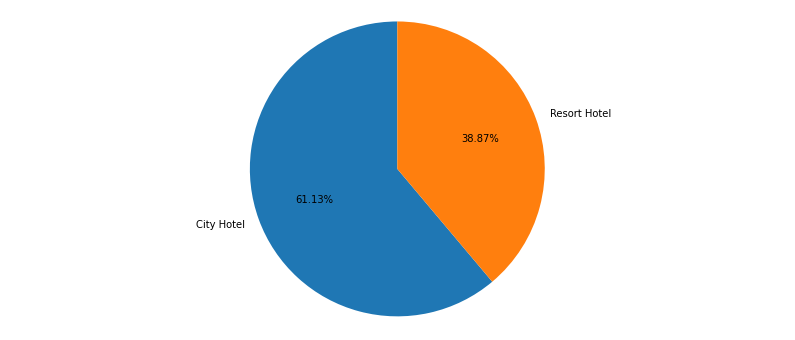

In [33]:
# plot a pie chart to show % of bookings from each hotel
plot_pie_chart_from_column(hotel_df, 'hotel')

Number of bookings for City Hotel is 1.6 times more than that of Resort Hotel. City Hotel seems to be more preferred among travellers. 


Lets take a look at how many of these booking were made by repeated guests.

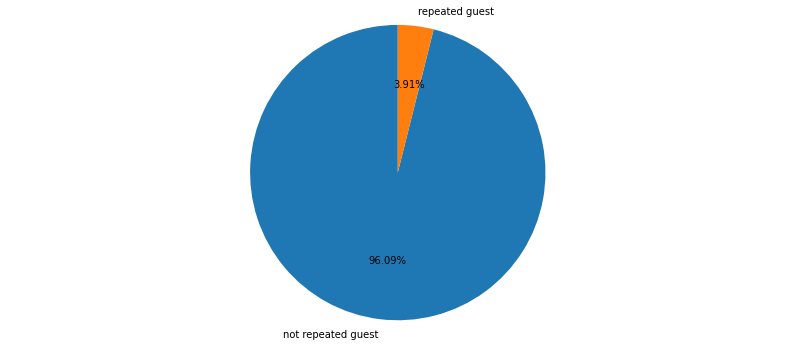

In [34]:
# plot a pie chart to show % of repeated guests
plot_pie_chart_from_column(hotel_df, 'is_repeated_guest')

Only a very small percentage (around 4%) of bookings are made by repeated guests. 



Lets check the number of bookings that got cancelled.

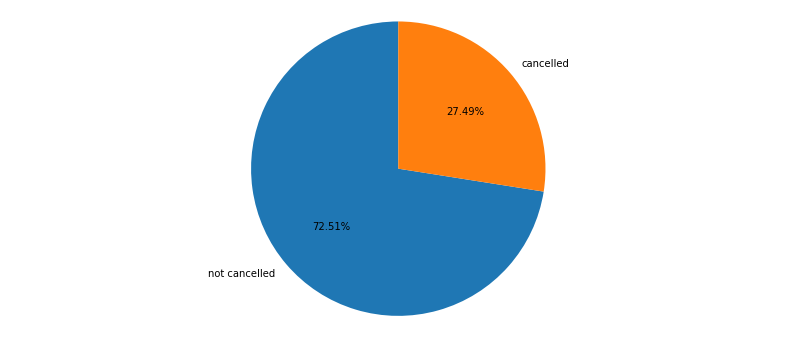

In [35]:
# plot a pie chart to show % of cancelled bookings
plot_pie_chart_from_column(hotel_df, 'is_canceled')

We can see that around one-fourth of the total bookings get cancelled.

## 2. Bivariate Analysis

In [36]:
# define a function to plot a stacked bar to show percentage of a feature in a grouped parameter
def stacked_bar_chart_with_percentage(df, pri_column_label, sec_column_label):
  # finding unique values in secondary column for grouping
  values = df[sec_column_label].unique()

  # creating a list of dataframes that gives the for each unique value in primary column
  # a dataframe is created for each unique value in secondary column
  list_of_counts_df = [df[df[sec_column_label] == value].groupby(pri_column_label)[sec_column_label].count().reset_index(name=f'{value}_count')
                       for value in values]
  
  # merge all dataframes into one dataframe
  df_merged = list_of_counts_df[0]
  for i in range(1, len(list_of_counts_df)):
    df_merged = pd.merge(df_merged, list_of_counts_df[i], how='inner', on=pri_column_label)
  
  # computing the percentage of unique values in secondary column contributed by each unique value in primary column
  df_merged['total_count'] = df_merged.sum(axis=1, numeric_only=True)
  for value in values:
    df_merged[f'{value}_count'] = round(df_merged[f'{value}_count'] / df_merged['total_count'] * 100)
  df_merged.drop('total_count', axis=1, inplace=True)

  # plotting a stacked bar graph to represent the % of unique values in secondary column 
  # segmented by each unique value in primary column
  ax = df_merged.plot(x=pri_column_label, kind='bar', stacked=True, figsize=(12,6))
  for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
  plt.xticks(rotation='horizontal')
  plt.show()

Lets check which hotel is more preferred by repeated guests. 

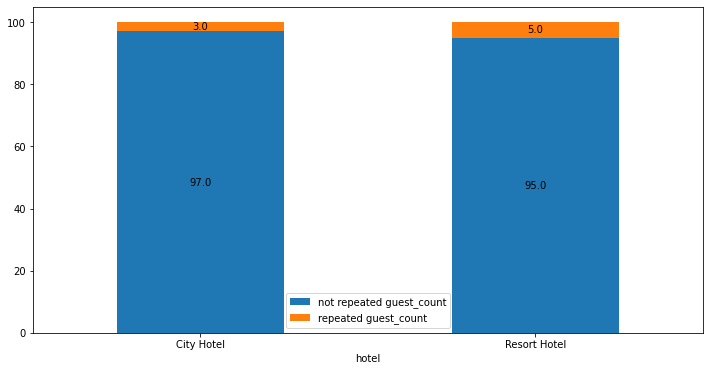

In [37]:
stacked_bar_chart_with_percentage(hotel_df, 'hotel', 'is_repeated_guest')

The percentage of repeated guests in Resort Hotel is greater than that of City Hotel. 



Lets check the distribution of cancelled bookings among the two hotels.

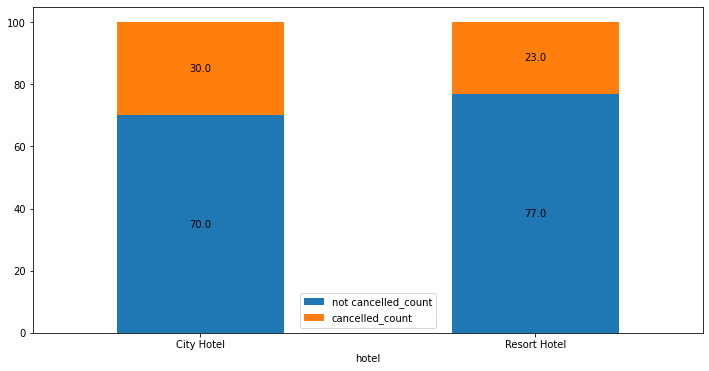

In [38]:
stacked_bar_chart_with_percentage(hotel_df, 'hotel', 'is_canceled')

The percentage of cancelled bookings is almost the same for both hotels (only 7% difference).

Lets now check the percentage of cancellations among repeated guests.

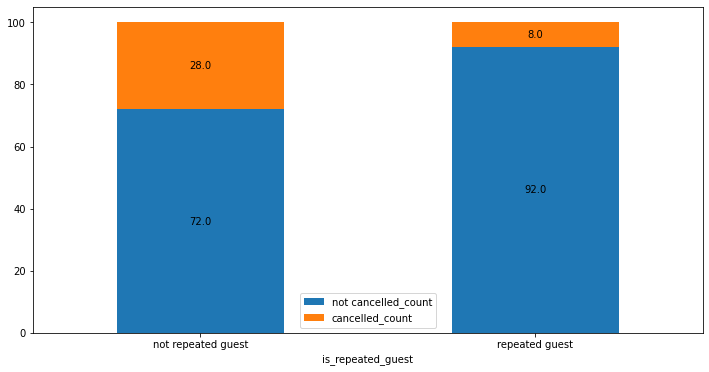

In [39]:
# plot a stacked bar graph to show % of bookings cancelled by repeated guests
stacked_bar_chart_with_percentage(hotel_df, 'is_repeated_guest', 'is_canceled')

The percentage of bookings cancelled by new guests are more than that of repeated guests. So we can conclude that new guests tends to cancel bookings more than repeated customers.

Lets check if lead time or number of days in waiting list motivates the customers to cancel the booking. For that we need to generate a density plot of lead time and number of days in waiting list for both cancelled and non-cancelled bookings.

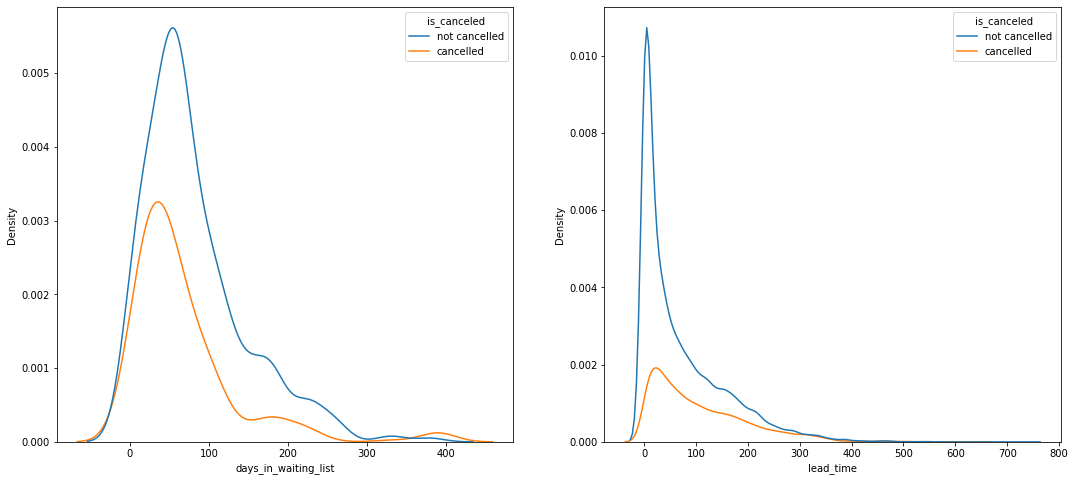

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# a very high number of records have zero number of days in waiting list
# thats why here only non-zero data is considered
sns.kdeplot(data = hotel_df[hotel_df['days_in_waiting_list'] != 0], ax = axes[0], x = 'days_in_waiting_list', hue = 'is_canceled')
sns.kdeplot(data = hotel_df, ax = axes[1], x = 'lead_time', hue = 'is_canceled')
plt.show()

Density plot of lead time and number of days in waiting list peaks at the same point for both cancelled and non-cancelled bookings and they also attain almost identical shape. Thus we can conclude that lead time and number of days in waiting list does not affect cancellation of bookings.



Now lets check if failing to assign the reserved room type affects the cancellation of bookings. For that we need to plot a bar graph that displays the number of bookings cancelled when reserved room type is the same and different as the assigned room type.

In [41]:
# define a function to plot a bar graph from grouped count values
# so that it can be used in the later stages also
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")

def plot_bar_graph_from_column(df, column_label, x_label, y_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})

  # ax = plt.figure(figsize=(12, 8))
  # fig = df_grpd.plot(kind='bar')

  plt.bar(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  add_value_label(df_grpd['index'].tolist(), df_grpd['count'].tolist())
  plt.xlabel(column_label)
  plt.ylabel("Count")
  plt.xticks(rotation='horizontal')
  plt.show()

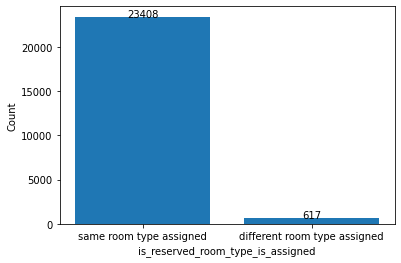

In [42]:
# plot a bar graph to show the number of bookings cancelled when reserved room type is the same and different as the assigned room type
plot_bar_graph_from_column(hotel_df[hotel_df['is_canceled'] == 'cancelled'], 'is_reserved_room_type_is_assigned', 'room type assignment status', 'number of bookings')

The number of bookings where same room type is assigned is far greater than that where different room type is assigned so we cannot conclude that room type assignment affect the number of cancellations.

Now lets check which distribution channel contributed the most number of cancelled and non-cancelled bookings. Lets exclude Undefined for easy analysis.

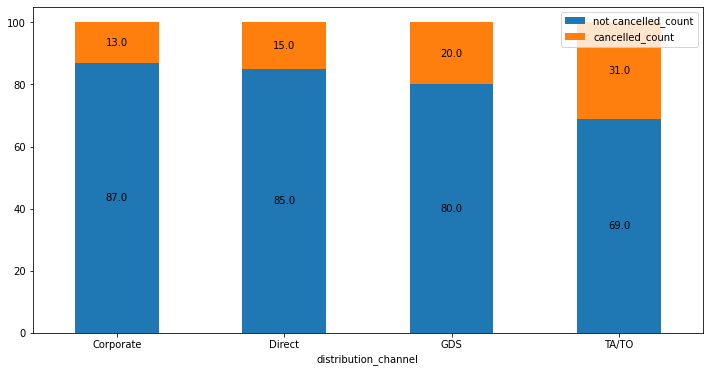

In [43]:
# plot a stacked bar graph to represent the % of cancelled and non-cancelled 
# bookings in each distribution channel
stacked_bar_chart_with_percentage(hotel_df[hotel_df['distribution_channel'] != 'Undefined'], 'distribution_channel', 'is_canceled')

TA/TO has the most percentage of cancelled bookings while Corporate has the least.

## 3. Multivariate Analysis

## 4. Relationship Analysis